## Метрики, методы их расчета и визуализации на основе имеющихся данных, таблицы Searches и Widget clicks  



## 1. Метрики
Метрики, которые можно предложить, зависят от целей анализа данных. Вот примеры метрик для анализа двух типов событий:  
**A. Searches (Поиск)**  
* Процент успешных поисков (Search Success Rate)

* Источники, откуда пользователи переходили чаще всего.

**B. Widget Clicks (Виджеты)**  
* Процент кликов, приводящий к добавлению товара в корзину.

* Click Through Rate, показывает, какой виджет привлекает пользователей больше остальных.

## 2. Методы визуализации



**A. Процент успешных поисков, изменяющийся со временем.**

Накопленная столбчатая диаграмма.

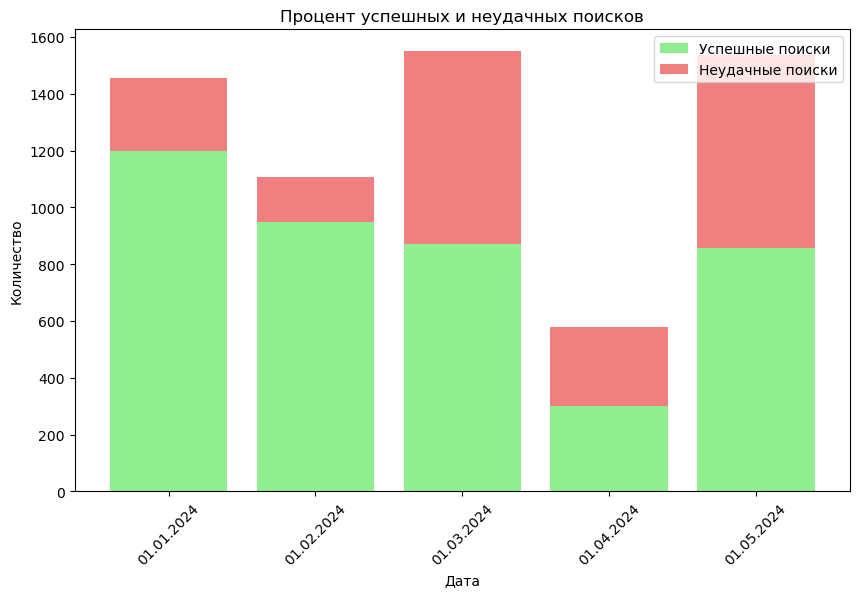

In [18]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

# conn = sqlite3.connect('Database.db')

# searches_by_date_sql = '''
#     SELECT
#         timestamp,
#         SUM(CASE WHEN searchWorked = 1 THEN 1 ELSE 0 END) / COUNT(*) * 100 AS success_rate,
#         SUM(CASE WHEN searchWorked = 0 THEN 1 ELSE 0 END) / COUNT(*) * 100 AS failure_rate
#     FROM Searches
#     GROUP BY timestamp
#     ORDER BY timestamp ASC
#     ;'''

# searches_by_date = pd.read_sql(searches_by_date_sql, conn)

# timestamp = searches_by_date.iloc[:10, 0]
# success_rate = searches_by_date.iloc[:10, 1]

# Т.к. данных нет, приведу рукописный пример:


searches_by_date = {
    'timestamp': ['01.01.2024', '01.02.2024', '01.03.2024', '01.04.2024', '01.05.2024'],
    'success_rate': [1200, 950, 870, 300, 857],
    'failure_rate': [256, 156, 679, 280, 679]
}
df = pd.DataFrame(searches_by_date)

# Создание накопленной столбчатой диаграммы
plt.figure(figsize=(10, 6))
plt.bar(df['timestamp'], df['success_rate'], label='Успешные поиски', color='lightgreen')
plt.bar(df['timestamp'], df['failure_rate'], bottom=df['success_rate'], label='Неудачные поиски', color='lightcoral')

# Настройка графика
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.title('Процент успешных и неудачных поисков')
plt.xticks(rotation=45)
plt.legend()
plt.show()

**B. Соотношение: клики - добавление в корзину - покупки.**

Группированная столбчатая диаграмма.

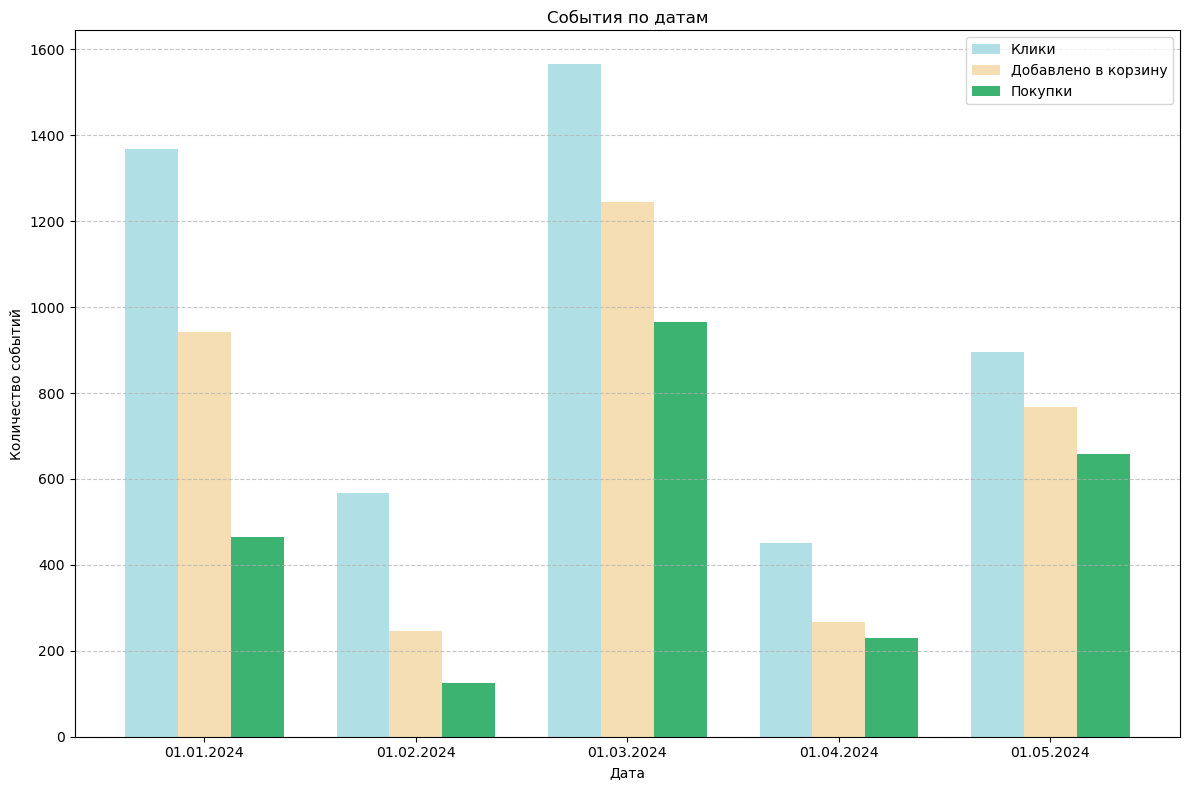

In [45]:
# eventType_share_sql = '''
#     SELECT
#         timestamp,
#         COUNT(*) AS click,
#         SUM(CASE WHEN eventType = 'add_to_basket' THEN 1 ELSE 0 END) AS add_to_basket),
#         SUM(CASE WHEN eventType = 'purchase' THEN 1 ELSE 0 END) AS purchase)
#     FROM Widget_clicks
#     GROUP BY timestamp
#     ORDER BY timestamp ASC
#     ;'''

# eventType_share = pd.read_sql(eventType_share_sql, conn)

# timestamp = eventType_share.iloc[:10, 0]
# click = eventType_share.iloc[:10, 1]
# add_to_basket = eventType_share.iloc[:10, 2]
# purchase = eventType_share.iloc[:10, 3]

# Т.к. данных нет, приведу рукописный пример:


searches_by_date = {
    'timestamp': ['01.01.2024', '01.02.2024', '01.03.2024', '01.04.2024', '01.05.2024'],
    'click': [1367, 567, 1566, 450, 896],
    'add_to_basket': [943, 247, 1244, 267, 768],
    'purchase': [464, 126, 966, 229, 659],
}
df = pd.DataFrame(searches_by_date)

# Параметры
x = np.arange(len(df['timestamp']))  # Количество столбцов
width = 0.25  # Ширина каждого столбца

# Создание графика
plt.figure(figsize=(12, 8))
plt.bar(x - width, df['click'], width, label='Клики', color='powderblue')
plt.bar(x, df['add_to_basket'], width, label='Добавлено в корзину', color='wheat')
plt.bar(x + width, df['purchase'], width, label='Покупки', color='mediumseagreen')

# Настройка осей и заголовков
plt.xlabel('Дата')
plt.ylabel('Количество событий')
plt.title('События по датам')
plt.xticks(x, df['timestamp'])  # Настройка меток на оси X
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Добавление горизонтальной сетки
plt.tight_layout()  # Подгонка элементов графика
plt.show()